# 首先说明这个文本的格式
"""
ITEM: TIMESTEP
0
ITEM: NUMBER OF ATOMS
8000
ITEM: BOX BOUNDS xy xz yz pp pp pp
0.0000000000000000e+00 4.6533427000000003e+01 0.0000000000000000e+00
0.0000000000000000e+00 4.6533427000000003e+01 0.0000000000000000e+00
0.0000000000000000e+00 4.6533427000000003e+01 0.0000000000000000e+00
ITEM: ATOMS id type x y z c_Ke_atom c_Pe_atom v_E_total
124 1 2.58039 3.51121 2.23636 0.0825842 -10.2941 -10.2115
140 1 2.66513 4.62293 5.07125 0.02891 -9.33703 -9.30812
"""
本代码旨在读取文本中的数据，每一帧中的原子的信息要放在一个class中，然后所有原子放在
#一个列表中，这个最后每一帧的列表放在总的列表中供之后的处理使用

In [46]:
#文件路径
file_path = r'C:\Users\zhang\Desktop\g300K_100p.xyz'

# 是否生成xyz文件
out_xyz = 1
# 生成xyz文件的地址
out_path = r'C:\Users\zhang\Desktop\out11.xyz'
list_type = ['O','Nb','Li']


#所有信息储存的总列表
list_all_frames = []
# 每一个原子的信息
class Atom:
    def __init__(self, _id, _type, q,x, y, z):
        self.id = _id
        self.type = _type
        self.q = q
        self.x = x
        self.y = y
        self.z = z

In [47]:
# 打开文件并读取所有行数据
with open(file_path, 'r') as file:
    lines = file.readlines()
int(lines[3])

6500

In [48]:
# 打开文件并读取所有行数据
with open(file_path, 'r') as file:
    lines = file.readlines()
# 每一页的原子数
num_atom =int(lines[3])
# 定义一页的行数
lines_per_page = num_atom + 9
# 计算总页数
total_pages = (len(lines) + lines_per_page - 1) // lines_per_page
# 遍历每一页
for page in range(total_pages):
    # 计算当前页的起始行号和结束行号
    start_line = page * lines_per_page
    end_line = start_line + lines_per_page
    # 从总行数据中获取当前页的行数据
    page_lines = lines[start_line:end_line]
    ## 开始分析每一页中的数据
    # 每一页的数据存储在这个list中
    list_frame = []
    #print("Current frame number :",page)
    # 每一页的第九行开始才是原子数据
    for i_atom in page_lines[9:]:
        ii = i_atom.split()
        atom = Atom(int(ii[0]),int(ii[1]),float(ii[2]),float(ii[3]),float(ii[4]),float(ii[5]))
        list_frame.append(atom)
    list_all_frames.append(list_frame)
# 输出文档中的其他信息
print('\nResult analysis completed')
print("Other information:")
print("Number of total frames:",total_pages)
print("Number of atoms:", lines[3].split()[0])
print('Box XYZ:',round(float(lines[5].split()[1]),3), round(float(lines[6].split()[1]),2),round(float(lines[7].split()[1]),2))


Result analysis completed
Other information:
Number of total frames: 101
Number of atoms: 6500
Box XYZ: 120.0 50.0 12.19


In [49]:
vars(list_all_frames[0][0])

{'id': 5842, 'type': 3, 'q': 0.6, 'x': 1.19198, 'y': 1.91315, 'z': 5.15806}

In [50]:
lines[3].split()[0]

'6500'

In [52]:
# 生成xyz格式文件
if out_xyz == 1:
    # 打开文件，以追加模式打开
    with open(out_path, 'a') as file:
        for i in list_all_frames:
            file.write(lines[3].split()[0] + '\n')
            file.write('Atoms\n')
            # 每一帧当中的代码
            for ii in i:
                file.write(list_type[ii.type-1] +' '+ str(ii.x) + ' '+ str(ii.y)+' '+str(ii.z) +'\n')
print('output has been completed')

output has been completed


# 分析ke，pe，以及e_total三种能量的分布情况

In [70]:
# 分析数据选项
ana_frame = 1000
# 分析能量值 pe ke or e_total
ana_type = 'total energy'
# 切分份数
x_split_size = 100
y_split_size = 50

In [71]:
# 读取数据，假设x和y分别为x轴和y轴的数据，z为能量数据
list_x = []
list_y = []
list_z = []
list_pe = []
list_ke = []
list_e_total = []
# 此处并不是把每一帧的数据都放进去，而是选择某一帧进行分析

i = list_all_frames[ana_frame]
for ii in i:
    list_x.append(ii.x)
    list_y.append(ii.y)
    list_z.append(ii.z)
    list_ke.append(ii.c_ke_atom)
    list_pe.append(ii.c_pe_atom)
    list_e_total.append(ii.v_e_total)

In [72]:
len(list_all_frames)

1001

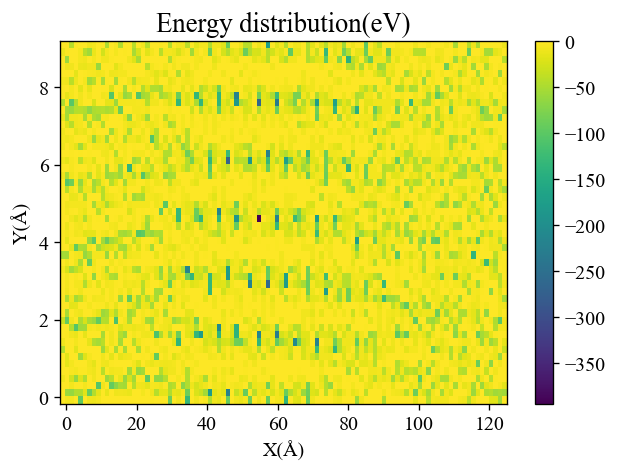

Analysis frame: 1000
Analysis type: total energy  Total energy: -85237.81171186


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
# 设置局部字体
font = FontProperties()
font.set_family('Times New Roman')
# 创建绘图窗口
fig = plt.figure(dpi=120)

# 将x，y，energy转化为numpy数组
x = np.array(list_x)
y = np.array(list_y)

# 辨别分析的能量类型
energy = []
if ana_type == 'pe':
    energy = np.array(list_pe)
elif ana_type == 'ke':
    energy = np.array(list_ke)
else:
    energy = np.array(list_e_total)


# 设置xy网格
x_grid = np.linspace(x.min(), x.max(), x_split_size)
y_grid = np.linspace(y.min(), y.max(), y_split_size)
X, Y = np.meshgrid(x_grid, y_grid)

# 计算每个网格上的总能量
total_energy = np.zeros_like(X)
for i in range(len(x)):
    # 找到x，y所在的网格
    x_idx = np.abs(x_grid - x[i]).argmin()
    y_idx = np.abs(y_grid - y[i]).argmin()
    # 将能量加到所在网格上
    total_energy[y_idx, x_idx] += energy[i]

# 绘制能量分布图
plt.pcolormesh(X, Y, total_energy)
plt.colorbar()
plt.title('Energy distribution(eV)',fontproperties=font, fontsize=16)

plt.xlabel('X(Å)', fontproperties=font, fontsize=12)
plt.ylabel('Y(Å)', fontproperties=font, fontsize=12)


#
plt.show()

# 计算总能量
print('Analysis frame:',str(ana_frame))
total_energy_sum = np.sum(total_energy)
print('Analysis type:',ana_type,' Total energy:',total_energy_sum)

In [48]:
# 计算晶体区域和非晶区域的能量差别
e_cry = 0
count_cry_atom = 0
# 
e_glass = 0
count_glass_atom = 0
#  分析的列表 
cal_list = list_all_frames[100]
# 计算区域的总能量
for i in cal_list:
    # cry 50-60
    if 70<i.x<80:
        count_cry_atom+=1
        e_cry+=i.v_e_total
    elif 100<i.x<110:
        count_glass_atom+=1
        e_glass+=i.v_e_total
print('e')        
print('e_cry:',e_cry/count_cry_atom,' e_glass',e_glass/count_glass_atom)

e
e_cry: -13.069374973577222  e_glass -14.253412912423634
